In [10]:
# importing necessary packages
import numpy as np
import scipy as sci
import scipy.sparse
import matplotlib.pyplot as plt
import time

In [11]:
# defining dense function with boundaries and N as input
def Finite_Difference_Dense(a,b,N):
    # defining h 
    h = (b-a)/(N+1)
    # creating plain matrix for A 
    A = np.zeros([N,N])
    # filling in new values of A with double for loop
    for i in range(N):
        for j in range(N):
            #conditions of Aij as in (5)
            if i == j+1:
                A[i][j] = -1/(h**2)
            elif i == j-1:
                A[i][j] = -1/(h**2)
            elif i == j:
                A[i][j] = 2/(h**2)
            else:
                A[i][j] = 0
    # returning the matrix as output
    return A

In [12]:
# defining the sparse function
def Finite_Difference_Sparse(a, b, N):
    # creating plain array for e values
    h = np.ones(N)
    # filling h with the h equation
    for i in range(N):
        h[i] = (b-a)/(N+1)
    # classifying my B as the h conditions given in (5)
    B = [-1/(h**2), 2/(h**2), -1/(h**2)]
    # using spdiags to get matrix A
    A = sci.sparse.spdiags(B, [-1, 0, 1], N,N) 
    # returning the resulting matrix
    return A

In [13]:
def Thomas_Solver(a, b, c, d):
    
    # number of equations
    numEq = len(d) 
    # copying the diagonals into more readable names
    low, mid, upp, sol = a, b, c, d
    # looping through the number of equations
    for i in range(1, numEq):
        # following instructions in (6) to classify values
        subAB = low[i-1]/mid[i-1]
        mid[i] = mid[i] - subAB*upp[i-1] 
        sol[i] = sol[i] - subAB*sol[i-1]
    
    # creating new variable copy to change last value
    xi = mid
    xi[-1] = sol[-1]/mid[-1]

    # looping to find the solution xi
    for j in range(numEq-2, -1, -1):
        xi[j] = (sol[j]-upp[j]*xi[j+1])/mid[j]

    return xi

In [14]:
def Poisson_Solver(string, f, a, b, ua, ub, N):
    # setting up conditions for different strings
    if string == 'dense':
        # initializing A using the dense equation
        A = Finite_Difference_Dense(a,b,N)
        # initializing timesteps list
        steps = np.linspace(a, b, N+1)
        # initializing structure for list x to be filled later
        x = np.ones(N)
        # calculating h
        h = (b-a)/(N+1)
        
        # looping through to find timesteps evaluated in function
        for i in range(1, N):
            x[i] = f(steps[i+1])
            
        # the second condition of fi changes here
        x[1] = x[1] + 1/(h**2)*ua
        x[-1] = x[-1] + 1/(h**2)*ub
        
        # using equivalent of backslash operator 
        U = np.linalg.solve(A, x)
        
    # in the case the string is 'sparse'
    elif string == 'sparse':
        # using sparse function defined above
        A = Finite_Difference_Sparse(a,b,N).A
        # initializing list of timesteps
        steps = np.linspace(a, b, N+1)
        # structure of set to be filled later
        x = np.ones(N)
        # calculating h
        h = (b-a)/(N+1)
        
        # looping through to find timesteps evaluated in function
        for i in range(1, N):
            x[i] = f(steps[i+1])
        
        # the second condition of fi changes here
        # adding the 1/h^2*ua and 1/h^2*ub
        x[1] = x[1] + 1/(h**2)*ua
        x[-1] = x[-1] + 1/(h**2)*ub
        
        # using equivalent of backslash operator
        U = np.linalg.solve(A, x)
        
    # in the case the string is 'thomas'
    elif string == 'thomas':
        # using the sparse function to get A 
        A = Finite_Difference_Sparse(a,b,N).A
        # initialize steps list
        steps = np.linspace(a, b, N+1)
        # calculating h
        h = (b-a)/(N+1)
        
        # grab the diagonals necessary (a=low b = mid, c = upp, x = d)
        low =  list(A.diagonal(-1))
        mid = list(A.diagonal(0))
        upp = list(A.diagonal(1))
    
        # initializing list to be filled later
        x = np.ones(N)
    
        # looping through to find timesteps evaluated in function 
        for i in range(1, N):
            x[i] = f(steps[i+1])

        # the second condition of fi changes here
        # adding the 1/h^2*ua and 1/h^2*ub
        x[1] = x[1] + 1/(h**2)*ua
        x[-1] = x[-1] + 1/(h**2)*ub
        
        # solution using the thomas solver defined above
        U = Thomas_Solver(low, mid, upp, x)
        
    return U, x

In [15]:
a = 0
b = 2*np.pi
N = 64
Finite_Difference_Sparse(a, b, N).A

array([[ 214.04100044, -107.02050022,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [-107.02050022,  214.04100044, -107.02050022, ...,    0.        ,
           0.        ,    0.        ],
       [   0.        , -107.02050022,  214.04100044, ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,  214.04100044,
        -107.02050022,    0.        ],
       [   0.        ,    0.        ,    0.        , ..., -107.02050022,
         214.04100044, -107.02050022],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
        -107.02050022,  214.04100044]])

In [16]:
a = 0
b = 2*np.pi
N = 64
Finite_Difference_Dense(a, b, N)

array([[ 214.04100044, -107.02050022,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [-107.02050022,  214.04100044, -107.02050022, ...,    0.        ,
           0.        ,    0.        ],
       [   0.        , -107.02050022,  214.04100044, ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,  214.04100044,
        -107.02050022,    0.        ],
       [   0.        ,    0.        ,    0.        , ..., -107.02050022,
         214.04100044, -107.02050022],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
        -107.02050022,  214.04100044]])

In [ ]:
# setting up input variables 
string = 'dense'
f = lambda x: -6*x - np.sin(x)
a = 0
b = 2*np.pi
ua = 5
ub = 8*(np.pi**3)+5
N = 64
# calling function 
U, x = Poisson_Solver(string, f, a, b, ua, ub, N)

# steps as x for graphing U as y
steps = np.linspace(a, b, N)

# setting up values for exact equation
Xvals = np.linspace(0, 2*np.pi, 100)
u = lambda x: x**3 - np.sin(x) + 5
Yvals = u(Xvals)

# plotting both on the same graph
plt.plot(Xvals, Yvals, 'r--')
plt.plot(steps, U, 'b')
plt.legend(['exact', 'approx'])
plt.show()

In [ ]:
# setting up input variables 
string = 'sparse'
f = lambda x: -6*x - np.sin(x)
a = 0
b = 2*np.pi
ua = 5
ub = 8*(np.pi**3)+5
N = 64
# calling function 
U, x = Poisson_Solver(string, f, a, b, ua, ub, N)

# steps as x for graphing U as y
steps = np.linspace(a, b, N)

# setting up values for exact equation
Xvals = np.linspace(0, 2*np.pi, 100)
u = lambda x: x**3 - np.sin(x) + 5
Yvals = u(Xvals)

# plotting both on the same graph
plt.plot(Xvals, Yvals, 'r--')
plt.plot(steps, U, 'k')
plt.legend(['exact', 'approx'])
plt.show()

In [ ]:
# setting up input variables 
string = 'thomas'
f = lambda x: -6*x - np.sin(x)
a = 0
b = 2*np.pi
ua = 5
ub = 8*(np.pi**3)+5
N = 64

# calling function
U, x = Poisson_Solver(string, f, a, b, ua, ub, N)

# steps as x for graphing U as y
steps = np.linspace(a, b, N)

# setting up values for exact equation
Xvals = np.linspace(0, 2*np.pi, 100)
u = lambda x: x**3 - np.sin(x) + 5
Yvals = u(Xvals)

# plotting both on the same graph
plt.plot(Xvals, Yvals, 'r--')
plt.plot(steps, U, 'g')
plt.legend(['exact', 'approx'])
plt.show()

In [ ]:
# setting up input variables 
string = 'sparse'
f = lambda x: -6*x - np.sin(x)
a = 0
b = 2*np.pi
ua = 5
ub = 8*(np.pi**3)+5
N = np.array([4, 8, 16, 32, 64, 128])

# exact equation xs and y
u = lambda x: x**3 - np.sin(x) + 5
Yexact = u(N)

# empty to be filled later
Ys = []
# appending the result for each N
for i in N:
    U, x = Poisson_Solver(string, f, a, b, ua, ub, i)
    Ys.append(U)

# empty to be filled later
L2norm = []
# appending l2 norm
for i in range(len(N)):
    L2norm.append(abs((1/np.sqrt(N[i]))*(np.sqrt(sum((Yexact[i]-Ys[i])**2)))))

# empty to be filled later    
LInfnorm = []
# appending L infinity norm
for i in range(len(N)):
    LInfnorm.append(max(abs(Yexact[i]-Ys[i])))
    
# plotting on loglog scale both on the same graph
plt.loglog(N, LInfnorm, 'o-')
plt.loglog(N, L2norm, 'o-')

# legend labels
plt.legend(['Linf', 'L2'])
plt.show()

# slopes of loglog norms
print("L Inf Norm", np.log(LInfnorm[-1]-LInfnorm[0])/np.log(N[-1]-N[0]))
print("L2 Norm", np.log(L2norm[-1]-L2norm[0])/np.log(N[-1]-N[0]))

In [16]:
# setting up variables to run function
string = 'dense'
f = lambda x: -6*x - np.sin(x)
a = 0
b = 2*np.pi
ua = 5
ub = 8*(np.pi**3)+5
# N values given in the question
N = [2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10, 2**11, 2**12, 2**13, 2**14, 2**15]

# empty times to be filled later
times = []

# looping through all of the N values
for i in range(len(N)):
    # initial time
    tic = time.time()
    # function running at N[i]
    U, x = Poisson_Solver(string, f, a, b, ua, ub, N[i])
    # ending time
    toc = time.time()
    # elapsed time by subtracting initial from final
    elapsed = toc-tic
    # appending this value to array of times
    times.append(elapsed)
print(times)

[0.0019998550415039062, 0.0030014514923095703, 0.004998922348022461, 0.010002613067626953, 0.04800224304199219, 0.17401337623596191, 0.6680655479431152, 2.6122071743011475, 10.962820529937744, 46.535985231399536, 215.0061275959015, 1156.9006271362305]


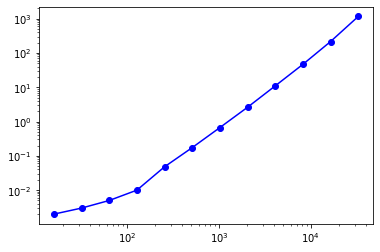

In [33]:
# plotting N on x and times on y for loglog plot
N = [2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10, 2**11, 2**12, 2**13, 2**14, 2**15]
timesDense = [0.0019998550415039062, 0.0030014514923095703, 0.004998922348022461, 0.010002613067626953, 0.04800224304199219, 0.17401337623596191, 0.6680655479431152, 2.6122071743011475, 10.962820529937744, 46.535985231399536, 215.0061275959015, 1156.9006271362305]

plt.loglog(N, timesDense, 'bo-')

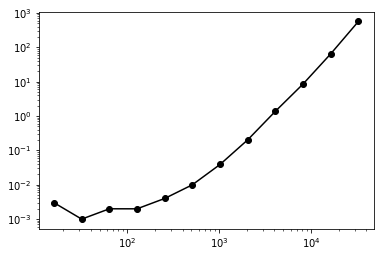

In [34]:
# x and y values for our loglog plot
N = [2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10, 2**11, 2**12, 2**13, 2**14, 2**15]
timesSparse = [0.0030002593994140625, 0.0010020732879638672, 0.002001047134399414, 0.0019979476928710938, 0.004000425338745117, 0.009999990463256836, 0.0390017032623291, 0.20301437377929688, 1.375103235244751, 8.535635471343994, 64.43085432052612, 564.1538195610046]

# plotting on loglog scale 
plt.loglog(N, timesSparse, 'ko-')

In [9]:
# setting up variables to run function
string = 'thomas'
f = lambda x: -6*x - np.sin(x)
a = 0
b = 2*np.pi
ua = 5
ub = 8*(np.pi**3)+5

# N values given in the question
N = [2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10, 2**11, 2**12, 2**13, 2**14, 2**15]

# empty times to be filled later
times = []

for i in range(len(N)):
    # initial time
    tic = time.time()
    # running function at N[i]
    U, x = Poisson_Solver(string, f, a, b, ua, ub, N[i])
    # ending time
    toc = time.time()
    # elapsed time by subtracting initial from final
    elapsed = toc-tic
    # appending this to times list
    times.append(elapsed)
print(times)

NameError: name 'Poisson_Solver' is not defined

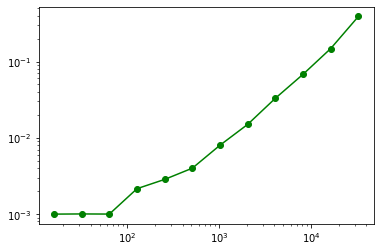

In [32]:
N = [2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10, 2**11, 2**12, 2**13, 2**14, 2**15]
timesThomas = [0.0009980201721191406, 0.001003265380859375, 0.00099945068359375, 0.0021522045135498047, 0.002847909927368164, 0.003998756408691406, 0.008002519607543945, 0.015004158020019531, 0.03299713134765625, 0.06800389289855957, 0.14801239967346191, 0.3900301456451416]
plt.loglog(N, timesThomas, 'go-')